# Algebra

These will be the notes for the self study of algebra

## Imports

In [3]:
%load_ext autoreload
%autoreload 2

import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colormaps
import matplotlib.path as mpath
import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from scipy.integrate import quad, nquad
from scipy.differentiate import derivative
import matplotlib.pyplot as plt
import itertools
from IPython.display import display, HTML

# ## Tomas Mazak's workaround
# plotly.offline.init_notebook_mode()
# display(HTML(
#     '<script type="text/javascript" async src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.1/MathJax.js?config=TeX-MML-AM_SVG"></script>'
# ))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# 1. Start with the seaborn template (which is naturally light)
light_custom_template = pio.templates['seaborn']

# 2. Define font properties
TNR_FONT = 'Times New Roman, serif'
ARIAL_FONT = 'Arial, sans-serif'
TEXT_COLOR_LIGHT = 'black' # Light theme text color
TICK_PAD_SIZE = 12

# 3. Customize the Layout
light_custom_template.layout.update(
    # --- Figure Size ---
    width=800,
    height=800,

    # --- Plot Title ---
    title={
        'font': {'family': TNR_FONT, 'size': 32, 'color': TEXT_COLOR_LIGHT}
    },

    # --- Legend ---
    legend={
        'font': {'family': TNR_FONT, 'size': 24, 'color': TEXT_COLOR_LIGHT},
        'bgcolor': 'rgba(255,255,255,0.7)' # Slightly transparent light background for legend
    },
)

# 4. Customize Axis Properties (Titles and Ticks)
for axis in ['xaxis', 'yaxis']:
    # Axis Label (Title) Font
    light_custom_template.layout[axis].title.font = dict(family=TNR_FONT, size=24, color=TEXT_COLOR_LIGHT)
    # Tick Label Font
    light_custom_template.layout[axis].tickfont = dict(family=ARIAL_FONT, size=18, color=TEXT_COLOR_LIGHT)
    # Gridline color (keep seaborn's default or set a light one)
    light_custom_template.layout[axis].gridcolor = 'rgba(200, 200, 200, 0.7)'
    light_custom_template.layout[axis].ticklabelstandoff = TICK_PAD_SIZE

# colorbar format
light_custom_template.layout.coloraxis = dict(
    colorbar=dict(
        title={'font': {'family': TNR_FONT, 'size': 20, 'color': TEXT_COLOR_LIGHT}},
        tickfont={'family': ARIAL_FONT, 'size': 18, 'color': TEXT_COLOR_LIGHT},
        tickcolor=TEXT_COLOR_LIGHT,
        ticklen=5,
        thickness=15,
    )
)

# 5. Register the new template
pio.templates['seaborn_light_custom'] = light_custom_template

In [5]:
# 1. Start with a COPY of the seaborn template
dark_custom_template = pio.templates['seaborn']

# 2. Define universal font properties and colors
TNR_FONT = 'Times New Roman, serif'
ARIAL_FONT = 'Arial, sans-serif'
TEXT_COLOR_DARK = 'white'
TICK_PAD_SIZE = 13
DARK_BG_PLOT = 'rgb(30, 30, 30)'
DARK_BG_PAPER = 'rgb(20, 20, 20)'
DARK_COLORBAR_CONFIG = dict(
    title={'font': {'family': TNR_FONT, 'size': 20, 'color': TEXT_COLOR_DARK}},
    tickfont={'family': ARIAL_FONT, 'size': 18, 'color': TEXT_COLOR_DARK},
    tickcolor=TEXT_COLOR_DARK,
    ticklen=5,
    thickness=15,
    # Additional property for dark theme:
    bgcolor='rgba(25,25,25,0.8)', # Add a dark background to the colorbar box itself
    outlinewidth=0, # Remove the default white outline
)

SHOW_CONFIG={
    'mathjax': 'https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.5/MathJax.js?config=TeX-AMS-MML_SVG',
    'responsive': True # Always a good config to include for notebooks
}

# 3. Customize the main Layout (applies to 2D plots and overall figure)
dark_custom_template.layout.update(
    width=800,
    height=800,
    paper_bgcolor=DARK_BG_PAPER,
    plot_bgcolor=DARK_BG_PLOT,
    title={'font': {'family': TNR_FONT, 'size': 32, 'color': TEXT_COLOR_DARK}},
    legend={
        'font': {'family': TNR_FONT, 'size': 24, 'color': TEXT_COLOR_DARK},
        'bgcolor': 'rgba(25,25,25,0.7)'
    },
)

# 4. Define a complete 2D Axis Template dictionary
axis_template_dark_2d = dict(
    title={'font': {'family': TNR_FONT, 'size': 24, 'color': TEXT_COLOR_DARK}},
    tickfont={'family': ARIAL_FONT, 'size': 18, 'color': TEXT_COLOR_DARK},
    ticklabelstandoff=TICK_PAD_SIZE,
    gridcolor='rgba(70, 70, 70, 0.5)',
    linecolor='rgba(200, 200, 200, 0.8)',
    tickcolor=TEXT_COLOR_DARK,
    showgrid=True,
    zeroline=True,
    showline=True,
)
dark_custom_template.layout.xaxis = axis_template_dark_2d
dark_custom_template.layout.yaxis = axis_template_dark_2d


# 5. Define the 3D Scene Template (CRUCIAL for 3D consistency)
axis_template_dark_3d = dict(
    title={'font': {'family': TNR_FONT, 'size': 24, 'color': TEXT_COLOR_DARK}},
    tickfont={'family': ARIAL_FONT, 'size': 16, 'color': TEXT_COLOR_DARK},
    backgroundcolor=DARK_BG_PLOT,       # The inner cube background
    gridcolor='rgba(70, 70, 70, 0.5)',
    linecolor='rgba(200, 200, 200, 0.8)',
    zerolinecolor='rgba(200, 200, 200, 0.8)',
    showbackground=True
)

dark_custom_template.layout.scene = dict(
    # Set the general scene background (often defaults to white)
    bgcolor=DARK_BG_PAPER,
    # Apply the custom axis styles to all three 3D axes
    xaxis=axis_template_dark_3d,
    yaxis=axis_template_dark_3d,
    zaxis=axis_template_dark_3d,
    # Set the cube's inner background (must be done explicitly)
    xaxis_backgroundcolor=DARK_BG_PLOT,
    yaxis_backgroundcolor=DARK_BG_PLOT,
    zaxis_backgroundcolor=DARK_BG_PLOT,
    # Ensure the view is not too squished (like Matplotlib's 'equal')
    aspectmode='auto'
)


# 6. Colorbar format (already corrected)
dark_custom_template.layout.coloraxis = dict(
    colorbar=dict(
        title={'font': {'family': TNR_FONT, 'size': 20, 'color': TEXT_COLOR_DARK}},
        tickfont={'family': ARIAL_FONT, 'size': 18, 'color': TEXT_COLOR_DARK},
        tickcolor=TEXT_COLOR_DARK,
        ticklen=5,
        thickness=15,
    )
)

# 7. Register the new template
pio.templates['seaborn_dark_custom'] = dark_custom_template

print("3D consistency fix applied. 'seaborn_dark_custom' now uses a dark background and white labels for 3D plots.")

3D consistency fix applied. 'seaborn_dark_custom' now uses a dark background and white labels for 3D plots.


In [6]:
# custom
from my_utils import defs as cp
from my_utils.classes import CEPAS_measurement, CEPAS_benchmark, CEPAS_noise_info, CEPAS_SNR_bench
cp.hello_test()

/home/labuser/miniconda3/envs/for_work/lib/python3.13/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


HAPI version: 1.2.2.4
To get the most up-to-date version please check http://hitran.org/hapi
ATTENTION: Python versions of partition sums from TIPS-2021 are now available in HAPI code

           MIT license: Copyright 2021 HITRAN team, see more at http://hitran.org. 

           If you use HAPI in your research or software development,
           please cite it using the following reference:
           R.V. Kochanov, I.E. Gordon, L.S. Rothman, P. Wcislo, C. Hill, J.S. Wilzewski,
           HITRAN Application Programming Interface (HAPI): A comprehensive approach
           to working with spectroscopic data, J. Quant. Spectrosc. Radiat. Transfer 177, 15-30 (2016)
           DOI: 10.1016/j.jqsrt.2016.03.005

           ATTENTION: This is the core version of the HITRAN Application Programming Interface.
                      For more efficient implementation of the absorption coefficient routine, 
                      as well as for new profiles, parameters and other functional,
      

## Ratios



### Example
Find the ratio compounded of three ratios: $2a:3b, 6ab:5c^2,c:a$


### Solution

$\frac{2a}{3b}\cdot\frac{6ab}{5c^2}\cdot\frac{c}{a} =$

$=\frac{4a}{5c}$

### ratio of greater inequality is diminished and ratio of less inequality is increased,
### when adding to both numerator and denominator an equal amount

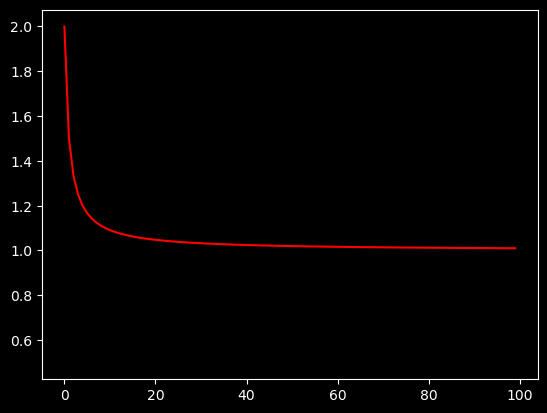

In [7]:
def ratio(a, b) -> float:
    return a / b



x = list(range(100))
less_y = [ratio(1+x[i], 2+x[i]) for i in range(len(x))]
greater_y = [ratio(2+x[i], 1+x[i]) for i in range(len(x))]

plt.plot(x, less_y, "k-")
plt.plot(x, greater_y, "r-")
plt.show()

If

$\frac{a}{b}=\frac{c}{d}=\frac{e}{f}...$

each of those equal

$\left(\frac{pa^n+qc^n+re^n+...}{pb^n+qd^n+rf^n+...}\right)^{\frac{1}{n}}$

where $p\ q\ r\ n\ $ are any quantities whatever.

Let

$\frac{a}{b}=\frac{c}{d}=\frac{e}{f}=k$

then

$a=bk,\ c=dk,\ e=fk,\ ...$

whence

$pa^n=pb^nk^n,\ qc^n=qd^nk^n,\ ...;$

$\implies \frac{pa^n+qc^n+re^n...}{pb^n+qd^n+rf^n...}=\frac{pb^nk^n+qd^nk^n+rf^nk^n...}{pb^n+qd^n+rf^n...}=k^n;$

$\implies\left(\frac{pa^n+qc^n+re^n}{pb^n+qd^n+rf^n}\right)^{\frac{1}{n}}=k=$

# Logic

In [8]:
print("Here will be the reference boolean table")
print("_________________________________________________________")
print("| p | q | p AND q | p OR q | p XOR q | p -> q | p <-> q |")
print("=========================================================")
print(f"| T | T |    T    |    T   |    F    |   T    |    T    |")
print("=========================================================")
print(f"| T | F |    F    |    T   |    T    |   F    |    F    |")
print("=========================================================")
print(f"| F | T |    F    |    T   |    T    |   T    |    F    |")
print("=========================================================")
print(f"| F | F |    F    |    F   |    F    |   T    |    T    |")
print("=========================================================")

Here will be the reference boolean table
_________________________________________________________
| p | q | p AND q | p OR q | p XOR q | p -> q | p <-> q |
| T | T |    T    |    T   |    F    |   T    |    T    |
| T | F |    F    |    T   |    T    |   F    |    F    |
| F | T |    F    |    T   |    T    |   T    |    F    |
| F | F |    F    |    F   |    F    |   T    |    T    |


# Friendly Rows


The purpose is to create simple algebra system based on the primary school concept of friendly rows.

The system could include units physics purposes.

But the primary functions must be present:

* creation of mathematical expression ($y = \int(\log_a (b\cdot c))^{d+1}da$)

* detection of math operators ($+$, $-$, $\cdot$, $^n$, $\sqrt[{n}]{}$, $\wedge$)

$\begin{equation}
\begin{split}
&\dfrac{d}{dx}\frac{3-2x^2}{4-3x^2}\\
&\left[\text{using: }\frac{f}{g}=\frac{gf'-fg'}{g^2}\right]\\
&=\frac{-4x(4-3x^2)-(-6x)(3-2x^2)}{(4-3x^2)^2}\\
&=\frac{12x^3-16x-12x^3+18x}{16-24x^2+9x^4}\\
&=\frac{2x}{16-24x^2+9x^4}\\
\end{split}
\end{equation}$

In [9]:
s, t, u = sp.symbols('s t u')

In [10]:
x = s*sp.cos(t)*sp.sin(u)
y = s*sp.sin(t)*sp.sin(u)
z = s*sp.cos(u)

w = x*y**2*z**3
w_f = sp.lambdify((s, t, u), w)
dw_ds = sp.diff(w, s)
dw_dt = sp.diff(w, t)
dw_du = sp.diff(w, u)

In [11]:
sp.simplify(dw_ds)

6*s**5*sin(t)**2*sin(u)**3*cos(t)*cos(u)**3

In [12]:
dw_dt

-s**6*sin(t)**3*sin(u)**3*cos(u)**3 + 2*s**6*sin(t)*sin(u)**3*cos(t)**2*cos(u)**3

In [13]:
sp.simplify(dw_du)

3*s**6*sin(t)**2*sin(u)**2*cos(t)*cos(u)**2*cos(2*u)

In [14]:
w_f(1, 2, 3)

np.float64(0.0009382531010861104)

# Multivariate things

In [15]:

list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'berlin',
 'managua',
 'vanimo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',

{'x': [0, 4, 4], 'y': [0, 0, 4], 'z': [0, 64, 32]}
0.17317818956819406


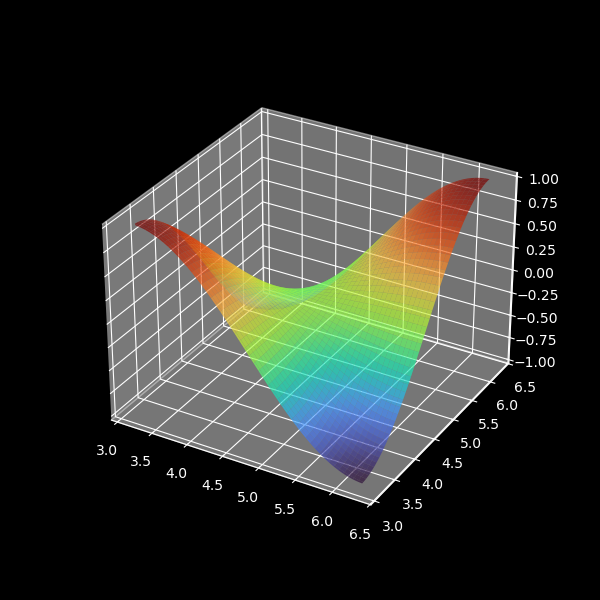

x=0, y=1.5707963267948966

x=0, y=3.141592653589793

x=0, y=4.71238898038469

x=0, y=6.283185307179586

x=1.5707963267948966, y=3.141592653589793

x=1.5707963267948966, y=4.71238898038469

x=1.5707963267948966, y=6.283185307179586

x=3.141592653589793, y=4.71238898038469

x=3.141592653589793, y=6.283185307179586

x=4.71238898038469, y=6.283185307179586



In [16]:
%matplotlib widget

N_POINTS = 100
X_POINTS, Y_POINTS, Z_POINTS = [], [], []
COORDS = {'x': X_POINTS, 'y': Y_POINTS, 'z': Z_POINTS}
BOUNDARY_0 = np.pi
BOUNDARY_1 = 2*np.pi

points = []

# points for 3d scatter
points.append([0, 0, 0])
points.append([4, 0, 64])
points.append([4, 4, 32])

# points for mask path
p1 = (np.pi, np.pi)
p2 = (np.pi, 2*np.pi)
p3 = (2*np.pi, 2*np.pi)
p4 = (2*np.pi, np.pi)

for p in points:
    cp.add_point(COORDS, p)

print(COORDS)

x, y = sp.symbols('x y')
z = sp.cos(x) * sp.cos(y) # type: ignore

z_f = sp.lambdify((x, y), z)
z_2_2 = z_f(x=2, y=2)
print(z_2_2)
points.append([3, 3, z_2_2])
cp.add_point(COORDS, points[-1])

xs = np.linspace(BOUNDARY_0, BOUNDARY_1, N_POINTS)
ys = np.linspace(BOUNDARY_0, BOUNDARY_1, N_POINTS)
xs, ys = np.meshgrid(xs, ys)
mask = cp.create_masks((xs, ys), [p1, p2, p3, p4])[1]
zs = z_f(xs, ys)
zs[mask] = np.nan

plt.close()
plt.figure(figsize=(6, 6))
ax1 = plt.subplot(111, projection="3d")
ax1.plot_surface(xs, ys, zs, cmap="turbo", alpha=0.7)  # type: ignore
# cp.draw_points(COORDS, xs, ys, BOUNDARY_0, BOUNDARY_1, N_POINTS, ax1)
plt.show()

# fig_surface = go.Figure(data=[
#     go.Surface(z=zs, x=xs, y=ys,
#                colorscale='Turbo',
#                showscale=False
#     )
# ])
# fig_surface.update_layout(
#     title='3D Surface Plot $\\frac{\\sin(R)}{R}$',
#     scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z')
# )
# fig_surface.show(cconfig={'scrollZoom': True})

for x, y in itertools.combinations([0, np.pi/2, np.pi, 3/2*np.pi, 2*np.pi], 2):
    print(f"x={x}, y={y}\n")

In [17]:
z_f(3, 3)

np.float64(0.9800851433251829)

In [18]:
for i in range(100):
    print(f"{i} -> {i**2}")

0 -> 0
1 -> 1
2 -> 4
3 -> 9
4 -> 16
5 -> 25
6 -> 36
7 -> 49
8 -> 64
9 -> 81
10 -> 100
11 -> 121
12 -> 144
13 -> 169
14 -> 196
15 -> 225
16 -> 256
17 -> 289
18 -> 324
19 -> 361
20 -> 400
21 -> 441
22 -> 484
23 -> 529
24 -> 576
25 -> 625
26 -> 676
27 -> 729
28 -> 784
29 -> 841
30 -> 900
31 -> 961
32 -> 1024
33 -> 1089
34 -> 1156
35 -> 1225
36 -> 1296
37 -> 1369
38 -> 1444
39 -> 1521
40 -> 1600
41 -> 1681
42 -> 1764
43 -> 1849
44 -> 1936
45 -> 2025
46 -> 2116
47 -> 2209
48 -> 2304
49 -> 2401
50 -> 2500
51 -> 2601
52 -> 2704
53 -> 2809
54 -> 2916
55 -> 3025
56 -> 3136
57 -> 3249
58 -> 3364
59 -> 3481
60 -> 3600
61 -> 3721
62 -> 3844
63 -> 3969
64 -> 4096
65 -> 4225
66 -> 4356
67 -> 4489
68 -> 4624
69 -> 4761
70 -> 4900
71 -> 5041
72 -> 5184
73 -> 5329
74 -> 5476
75 -> 5625
76 -> 5776
77 -> 5929
78 -> 6084
79 -> 6241
80 -> 6400
81 -> 6561
82 -> 6724
83 -> 6889
84 -> 7056
85 -> 7225
86 -> 7396
87 -> 7569
88 -> 7744
89 -> 7921
90 -> 8100
91 -> 8281
92 -> 8464
93 -> 8649
94 -> 8836
95 -> 9025


# Plotly tutorial

In [19]:
list(pio.templates.keys())
pio.templates.default = 'seaborn_dark_custom'

## line

In [ ]:
A, B, C, D, E, F \
    = 0.094003, -0.56312, 1.374705, \
        -1.601495, 1.060657, -0.269996
    



def f(x):
    return A*x**5 + B*x**4 + C*x**3 + D*x**2 + E*x + F
xs = np.linspace(0.5, 3.1, 100)

df = pd.DataFrame({
    'x': xs,
    'f(x)': f(xs)
})

fig_line = px.line(
    df,
    x='x',
    y='f(x)',
    title='Some function f(x)',
)

fig_line.update_layout(
    legend_borderwidth=1,
    legend_title=None
)

fig_line.show()

## scatter

In [21]:
# fig_scatter = px.scatter(
#     df,
#     x='signal A',
#     y='signal B',
#     color='category',
#     size='time',
#     title='signal A V signal B by category',
#     labels={
#         'signal A': 'Signal A value (a.u.)',
#         'signal B': 'Signal B value (a.u.)',
#         'color': 'expt group'
#     }
# )
# fig_scatter.show()

## bar

In [22]:
# df_bar = df.groupby('category').agg({'signal A': 'mean'}).reset_index()
# fig_bar = px.bar(
#     df_bar,
#     x='category',
#     y='signal A',
#     color='category',
#     title='avg signal A by category'
# )
# fig_bar.show()

## histogram

In [23]:
# fig_hist = px.histogram(
#     df,
#     x='signal A',
#     color='category',
#     nbins=15,
#     opacity=0.6,
#     title='Distribution of signal A'
# )
# fig_hist.update_layout(barmode='overlay')
# fig_hist.show()

## parametric

In [24]:
# t = np.linspace(0, 2*np.pi, 500)
# x_param = np.sin(3*t)
# y_param = np.cos(4*t)

# fig_param = go.Figure(
#     go.Scatter(
#         x=x_param,
#         y=y_param,
#         mode='lines',
#         name='Lissajous Curve'
#     )
# )
# fig_param.update_layout(
#     title='2d parametric plot (lissajous)',
#     xaxis_title='X(t)',
#     yaxis_title='Y(t)'
# )
# fig_param.show()

## marginal plots

In [25]:
# fig_marginal = px.scatter(
#     df,
#     x='signal A',
#     y='signal B',
#     marginal_x='violin',
#     marginal_y='violin',
#     title='scatter w/ marginal plots',
#     width=800,
#     height=800
# )
# fig_marginal.show()

## 3d plots

In [26]:
# t = np.linspace(-50, 50, 5000)
# x = t*np.cos(t)
# y = t*np.sin(t)
# z = t
# color = np.sin(2*t)
# size = 5

# fig = px.scatter_3d(
#     x=x,
#     y=y,
#     z=z,
#     color=color,
#     size=np.cos(t)**2 * 10,
#     title="3d phase plot w/ color encoding",
#     labels={'x': 'x', 'y': 'y', 'z': 'z', 'color': 'phase'}
# )

# fig.update_traces(marker={
#     'size': 3,
#     'opacity': 0.8
# })
# fig.show()

## Surface 3d plot

In [27]:
# X_surf = np.arange(-5, 5, 0.25)
# Y_surf = np.arange(-5, 5, 0.25)
# X_surf, Y_surf = np.meshgrid(X_surf, Y_surf)
# R = np.sqrt(X_surf**2 + Y_surf**2)
# Z_surf = np.sin(R)

# fig_surface = go.Figure(data=[
#     go.Surface(z=Z_surf, x=X_surf, y=Y_surf,
#                colorscale='Viridis',
#                colorbar=DARK_COLORBAR_CONFIG)
# ])
# fig_surface.update_layout(
#     title='3D Surface Plot $\\frac{\\sin(R)}{R}$',
#     scene=dict(xaxis_title='X Axis', yaxis_title='Y Axis', zaxis_title='Z Axis')
# )
# fig_surface.show(config=SHOW_CONFIG)